In [34]:
import pandas as pd
import re
from pprint import pprint

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
path = './data/data_with_segment.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 30)

In [25]:
cols = ['ART2DIA','ART2MEAN','ART2SYS','ARTDIA','ARTMEAN','ARTSYS',
        'BIS','CVP','EtCO2','HR','NBPDIA','NBPMEAN',
        'NBPSYS','PR','RR','SPO2','T1','T2']

In [77]:
def time_describe(df,cols):
    plt.figure(figsize=(15,24))
    for idx,col in enumerate(cols):
        plt.style.context(['science','grid','notebook'])
        operation_time = df[col].apply(lambda s:len(re.split(r'\s+',str(s))))
        plt.subplot(6,3,idx+1)
#         plt.ylim([0,2000])
        plt.hist(operation_time,bins=70,edgecolor='black',color='#00b141')
        plt.ylabel('频数',fontdict={'size':14})
        plt.xlabel(col,fontdict={'size':14})

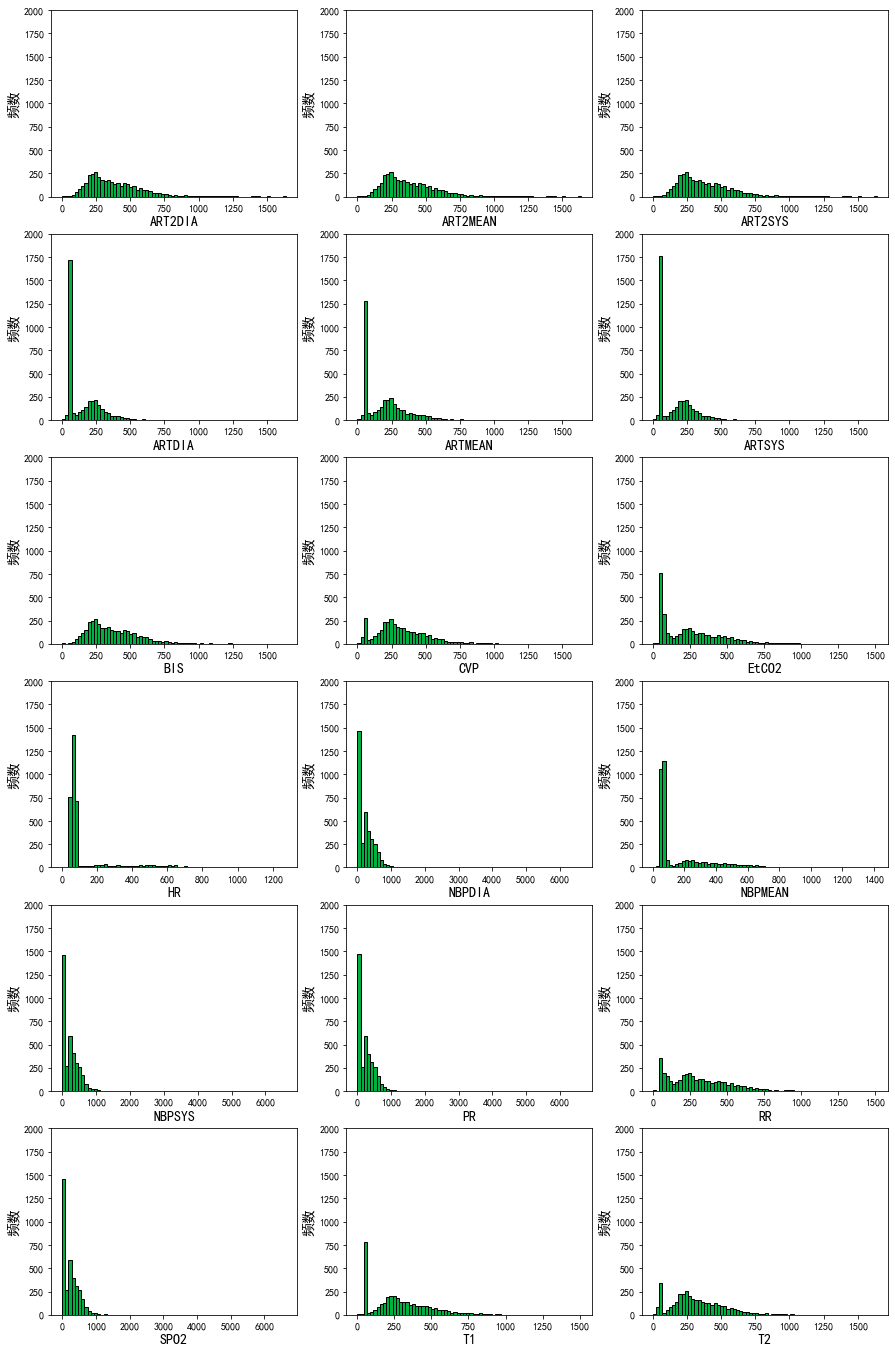

In [27]:
time_describe(df,cols)

In [28]:
path_time_series = './data/data_with_time_series.xlsx'
df_time = pd.read_excel(path_time_series)
df_time.shape

(3629, 31)

In [73]:
cols_manual = ['ARTDIA','ARTSYS','BIS','CVP','EtCO2','HR','NBPDIA','NBPSYS','PR','RR','SPO2','T1']

In [71]:
def parameter_describe(df,cols):
    miss_rate = {}
    total = df.shape[0]
    for col in cols:
        
        miss_rate[col] = round(df.loc[(df[col] == '0') | (df[col] == 0),col].shape[0] / total,4)
    return sorted(miss_rate.items(),key=lambda x:x[1])

In [47]:
df_time.loc[df_time['BIS'] == 0,'PR'].shape[0]

3629

In [56]:
df_time['CVP'].dtypes == 'O'

True

In [72]:
pprint(parameter_describe(df_time,cols))

[('SPO2', 0.0135),
 ('PR', 0.0309),
 ('NBPSYS', 0.0364),
 ('NBPDIA', 0.0372),
 ('HR', 0.3158),
 ('NBPMEAN', 0.4321),
 ('T1', 0.7291),
 ('EtCO2', 0.7421),
 ('ARTSYS', 0.8438),
 ('ARTDIA', 0.8473),
 ('RR', 0.8512),
 ('ARTMEAN', 0.8848),
 ('T2', 0.8931),
 ('CVP', 0.9843),
 ('ART2DIA', 1.0),
 ('ART2MEAN', 1.0),
 ('ART2SYS', 1.0),
 ('BIS', 1.0)]


D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [75]:
pprint(parameter_describe(df_time,cols_manual))

[('SPO2', 0.0135),
 ('PR', 0.0309),
 ('NBPSYS', 0.0364),
 ('NBPDIA', 0.0372),
 ('HR', 0.3158),
 ('T1', 0.7291),
 ('EtCO2', 0.7421),
 ('ARTSYS', 0.8438),
 ('ARTDIA', 0.8473),
 ('RR', 0.8512),
 ('CVP', 0.9843),
 ('BIS', 1.0)]


D:\software\Anaconda3\envs\dataAnalysis\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


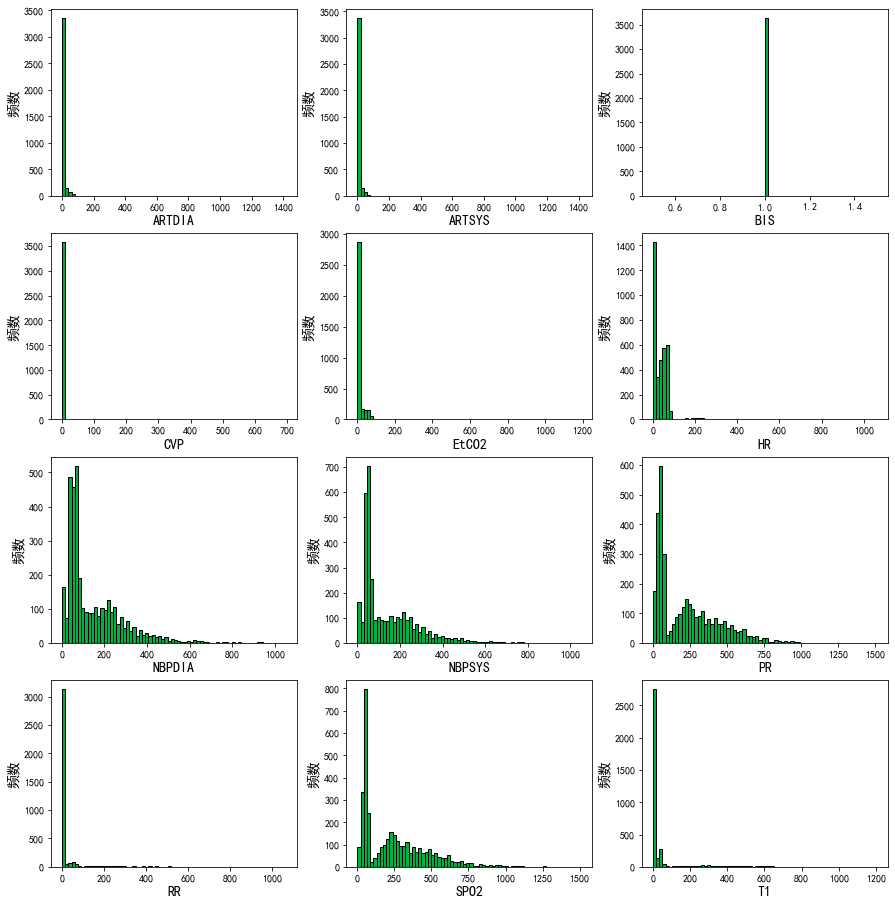

In [78]:
time_describe(df_time,cols_manual)